<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/289_tracking_particles_in_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tracking particles in 3D**

https://youtu.be/vqmavdOcjrU



Trackpy installation: http://soft-matter.github.io/trackpy/dev/installation.html

Trackpy strongly recommends using Conda and not pip. Therefore, we need to set up conda environment for our colab notebook. 

This specific topic has been covered in a separate tutorial: https://youtu.be/v4qskw8EHXQ

For more examples of trackpy and to download sample data sets: https://github.com/soft-matter/trackpy-examples

Let us start by understanding the current python version in our colab and installing the corresponding conda environment. 

In [ ]:
!which python
!python --version

/usr/local/bin/python
Python 3.7.13


It gives python 3.7.13.
https://docs.conda.io/en/latest/miniconda.html#system-requirements
The documentation recommends miniconda 4.12.0 for python 3.7 Linux 64 bit

Let us reset the default python path for colab. Just to make sure we do not run into any issues later when miniconda installs its own version of python. 

In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

Verify to see if the conda executable is available

In [ ]:
!which conda # should return /usr/local/bin/conda

/usr/local/bin/conda


Confirm the conda version

In [ ]:
!conda --version # should return 4.12.0

conda 4.12.0


Update conda

In [ ]:
%%bash
conda install --channel defaults conda python=3.7 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.4.26  |       h06a4308_0         124 KB
    certifi-2022.6.15          |   py37h06a4308_0         153 KB
    conda-4.13.0               |   py37h06a4308_0         890 KB
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following packages will be UPDATED:

  ca-certificates                      2022.3.29-h06a4308_1 --> 2022.4.26-h06a4308_0
  certifi                          2021.10.8-py37h06a4308_2 --> 2022.6.15-py37h06a4308_0
  conda                               4.12.0-py37h06a4308_0 --> 4.13.0-py37h06a4308_0



conda-4.13.0         | 890 KB    | ########## | 100% 
certifi-2022.6.15  

In [ ]:
!conda --version 

conda 4.13.0


In [ ]:
!python --version

Python 3.7.13


Provide directory where site packages are installed within miniconda

First, check the current paths.

In [ ]:
import sys
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

Now add the path for our site-packages

In [ ]:
import sys
_ = (sys.path
        .append("/usr/local/lib/python3.7/site-packages"))

Now, we are all set to install trackpy library using conda.

Please note that you will be prompted to answer Yes/No a couple of times.

In [ ]:
!conda install -c conda-forge trackpy
#!conda install -c conda-forge pims

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - trackpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bottleneck-1.3.5           |   py37h7deecbd_0         115 KB
    ca-certificates-2022.6.15  |       ha878542_0         149 KB  conda-forge
    certifi-2022.6.15          |   py37h89c1867_0         155 KB  conda-forge
    conda-4.13.0               |   py37h89c1867_1         989 KB  conda-forge
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    freetype-2.10.4            |       h0708190_1         890 KB  conda-forge
    icu-67.1                   |       he1b5a44_0        12.9 MB  conda-forge
   

In [ ]:
!conda install -c conda-forge pims

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pims


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    enum34-1.1.10              |   py37hc8dfbb8_2           4 KB  conda-forge
    imagecodecs-lite-2019.12.3 |   py37hda87dfa_5         176 KB  conda-forge
    imageio-2.6.1              |           py37_0         3.3 MB  conda-forge
    jinja2-3.1.2               |     pyhd8ed1ab_1          99 KB  conda-forge
    jpeg-9e                    |       h166bdaf_1         268 KB  conda-forge
    libtiff-4.0.10             |    hc3755c2_1005         602 KB  conda-forge
    lz4-c-1.9.3                |       h9c3ff4c_1         179 KB  conda-forge
    markupsafe-2.1.1           |   py

Now we are ready to focus on our goal of tracking particles in 3D.

Download the test data set from here: 

Import the required libraries

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('figure',  figsize=(10, 6))
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

import warnings
warnings.filterwarnings("ignore", module="matplotlib")

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3563520/45929032 bytes (7.8%)7307264/45929032 bytes (15.9%)11042816/45929032 bytes (24.0%)14483456/45929032 bytes (31.5%)18169856/45929032 bytes (39.6%)21889024/45929032 bytes (47.7%)25526272/45929032 bytes (55.6%)29065216/45929032 bytes (63.3%)32825344/45929032 bytes (71.5%)36569088/45929032 bytes (79.6%)40009728/45929032 bytes (87.1%)43622400/45929032 bytes (95.0%)

Make sure to upload your data to Google Drive and mount the drive to make it accessible via your colab notebook.

Load the 3D time series image from zip drive. We make use of ImageSequenceND. This reader class searches for files matching a certain search string. The filename should contain indentifiers for each axis (dimension). For example "demo_t001_z001.png" contains identifiers t and z. We set the returned image axes to zyx and the iterating axis to t. In this way we get 3D images indexed by t.

We will be using this data set:
https://github.com/soft-matter/trackpy-examples/blob/master/sample_data/pmma_colloids.zip

In [ ]:
frames = pims.ImageSequenceND(r'/content/drive/MyDrive/ColabNotebooks/data/tracking_data/pmma_colloids.zip', axes_identifiers = ['z', 't'])
frames.bundle_axes = ['z', 'y', 'x']
frames.iter_axes = 't'
frames

<ImageSequenceND>
Source: /content/drive/MyDrive/ColabNotebooks/data/tracking_data/pmma_colloids.zip
Axes: 4
Axis 'z' size: 25
Axis 't' size: 33
Axis 'y' size: 128
Axis 'x' size: 128
Pixel Datatype: uint8

In [ ]:
t_slice=frames[0]  #specific t slice (3D stack)
t_slice_for_specific_z=t_slice[0] #specific t slice for a given z stack(2D)

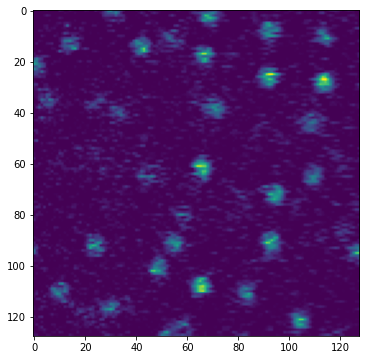

In [ ]:
plt.imshow(t_slice_for_specific_z)

**Locating features**

This step performs segmentation using Gaussian blob detection. We can use our own segmentation, e.g, Deep Learning based. This will be covered in the next tutorial. 

For blob detection, estimate the size of features. locate only requires a feature diameter. This needs to be an odd integer and can be specified for each dimension seperately. The order of dimensions is the same as the order of the image array, typically (z, y, x).



In [ ]:
features = tp.locate(frames[0], diameter=(5, 9, 9))
features.head()  # displays first 5 rows


,z,y,x,mass,size_z,size_y,size_x,ecc,signal,raw_mass,ep_z,ep_y,ep_x,frame
0,2.150307,9.127058,92.698579,4078.904707,1.397100,2.346068,2.775242,NaN,83.961955,11471.0,0.006037,0.013466,0.013466,0
1,1.966345,12.324782,54.751706,2798.073313,1.299836,2.373661,2.861476,NaN,60.255050,7476.0,0.009536,0.021271,0.021271,0
2,2.003977,37.991313,4.868746,3145.774586,1.272156,2.673398,2.848487,NaN,60.913575,8632.0,0.008166,0.018216,0.018216,0
3,2.008338,80.036620,58.814761,2922.205302,1.339245,2.223283,2.692462,NaN,76.388916,7986.0,0.008879,0.019806,0.019806,0
4,1.671356,115.246732,28.295780,2644.966218,1.288565,2.809659,2.506161,NaN,55.316112,7970.0,0.008898,0.019848,0.019848,0


locate returns a spreadsheet-like object called a DataFrame. It lists each feature's position,
various characterizations of its appearance, which we will use to filter out spurious features,
the "signal" strength and an estimate of uncertainty, both derived from this paper: https://www.cell.com/biophysj/fulltext/S0006-3495(05)73136-2

You can use tp.annotate3d to display the objects that we will be tracking.

In [ ]:
#tp.annotate3d(features, frames[0])


Remember that we can filter objects based on a few criteria. We can also force minimum separation between objects.

**Locating (segmenting) features in all 3D frames**

We use tp.batch

In [ ]:
f = tp.batch(frames, diameter=(7, 11, 11), separation=(3, 11, 11))

Frame 32: 165 features


**Link features into particle trajectories**

We have the locations of the particles in each frame. Next we'll track particles from frame to frame, giving each one a number for identification.

The linking features of trackpy support an arbitrary number of dimensions. The argument pos_columns will determine which and how many dimensions will be used. The standard set of columns is ['x', 'y']. For 3d we have to set this to ['x', 'y', 'z']. 

Linking treats all dimensions equally. 

For this example we are using a file with unequal pixel sizes: 0.21 microns in XY and 0.75 microns in Z, so we first define new columns in units of microns.

In [ ]:
f['xum'] = f['x'] * 0.21
f['yum'] = f['y'] * 0.21
f['zum'] = f['z'] * 0.75

Experimentally, there is a tradeoff between framerate and z pixel size. If you want to have higher z resolution, you scan slower and your framerate goes down. In this specific experiment the z resolution is low, so that we are able to link particles between subsequent frames. We try several linking distances here.

Frame 32: 165 trajectories present.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


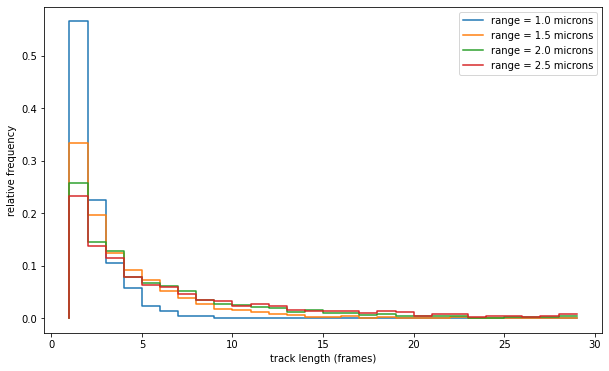

In [ ]:
for search_range in [1.0, 1.5, 2.0, 2.5]:
    linked = tp.link_df(f, search_range, pos_columns=['xum', 'yum', 'zum'])
    hist, bins = np.histogram(np.bincount(linked.particle.astype(int)),
                              bins=np.arange(30), normed=True)
    plt.step(bins[1:], hist, label='range = {} microns'.format(search_range))
plt.ylabel('relative frequency')
plt.xlabel('track length (frames)')
plt.legend()

We use a search range of 2.0 microns, because there is no significant improvement between 2.0 and 2.5 microns.

In [ ]:
linked = tp.link_df(f, 2.0, pos_columns=['xum', 'yum', 'zum'])

Frame 32: 165 trajectories present.


# Mean squared displacement

With the trajectories we can calculate the mean squared displacement. To calculate the mean squared displacement from all three dimensions, we need to tell trackpy which position columns to use. It defaults to ['x', 'y'].

We specify mpp=1 because we have already transformed our data to microns.

/usr/local/lib/python3.7/site-packages/trackpy/motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
/usr/local/lib/python3.7/site-packages/trackpy/motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


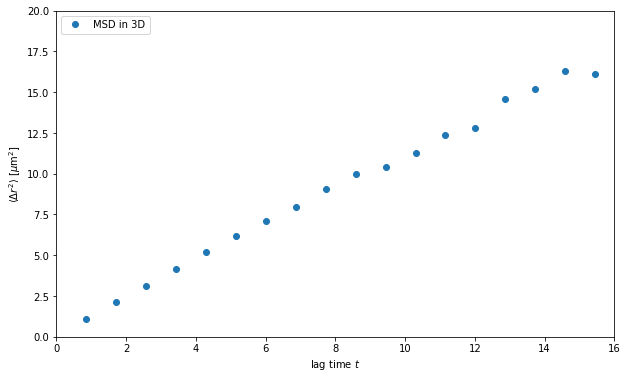

In [ ]:
msd3D = tp.emsd(linked, mpp=1, fps=1/0.8582, max_lagtime=20,
                pos_columns=['xum', 'yum', 'zum'])
ax = msd3D.plot(style='o', label='MSD in 3D')
ax.set_ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
ax.set_xlabel('lag time $t$')
ax.set_xlim(0, 16)
ax.set_ylim(0, 20)
ax.legend(loc='upper left')

The mean squared displacement in three dimensional Brownian motion is described by the following relation: ⟨$x^{2}$⟩=6Dt

Let's do a fit and calculate the diffusion constant!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


The diffusion constant is 0.18 μm²/s


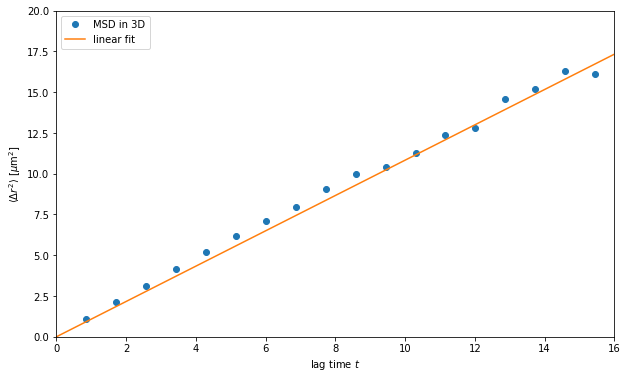

In [ ]:
slope = np.linalg.lstsq(msd3D.index[:, np.newaxis], msd3D)[0][0]

ax = msd3D.plot(style='o', label='MSD in 3D')
ax.plot(np.arange(20), slope * np.arange(20), label='linear fit')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]', xlabel='lag time $t$')
ax.set(xlim=(0, 16), ylim=(0, 20))
ax.legend(loc='upper left')
print(r'The diffusion constant is {0:.2f} μm²/s'.format(slope / 6))